In [104]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
rawdata_loc = "D:\Projects_IndranilDa\Customer_Acq_Model\customer_acq_model\data\\01_raw"
reporting_loc = "D:\Projects_IndranilDa\Customer_Acq_Model\customer_acq_model\data\\03_reporting" 
intermediate_loc = "D:\Projects_IndranilDa\Customer_Acq_Model\customer_acq_model\data\\02_intermediate"

In [12]:
## pulling Feature Engineered Data
data = pd.read_csv(f"{intermediate_loc}\\feature_engineered_data.csv")
data.head(5)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,education,member_card,occupation,houseowner,...,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
0,0.305667,0.267690,0.6,1,1,0.2,1.00,0.666667,0.75,1,...,1,0,0,0,0,0,0,0,0,0
1,0.223561,0.254222,0.4,1,0,0.0,0.50,0.000000,1.00,1,...,1,0,0,0,0,0,0,0,0,0
2,0.141455,0.125312,0.2,0,1,0.8,1.00,0.666667,0.50,0,...,1,0,0,0,0,0,0,0,0,0
3,0.141455,0.106072,0.2,1,1,0.4,0.75,1.000000,0.50,1,...,0,0,1,0,0,0,0,0,0,0
4,0.159304,0.132256,0.4,1,0,0.0,1.00,1.000000,0.75,0,...,0,0,0,0,1,0,0,0,0,0


## Random Train-Test Data Splitting Function

##### This function randomly splits a dataset into training and testing subsets. It is intended for use with non-temporal data, where random splitting is appropriate.

#### Parameters:
##### df (pd.DataFrame): The dataset to be split.

##### test_size (float, default = 0.3): Proportion of the dataset to include in the test split. (e.g., 0.3 indicates 30% test data)

##### random_state (int or None, default = None): Controls the randomness for reproducibility. If set to an integer, the split can be reproduced.

#### Returns:
##### train_df (pd.DataFrame): Training subset of the original dataframe.

##### test_df (pd.DataFrame): Testing subset of the original dataframe.

#### This would split the original dataset (df) into two parts: 70% training data and 30% testing data, ensuring reproducibility due to the fixed random state (42).

In [14]:
## Randomly splitting the data into train-test-split

# Since this data is not a temporal data, so we can split the data randomly into test and train

def split_data(df, test_size = 0.3, random_state = None):
    train_df, test_df = train_test_split(df, test_size = test_size, random_state = random_state)
    return train_df, test_df

In [16]:
train_df, test_df = split_data(data, test_size = 0.3, random_state = 2)

In [18]:
train_df.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,education,member_card,occupation,houseowner,...,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
56745,0.112896,0.113266,0.6,1,0,0.6,0.50,0.333333,0.25,1,...,0,0,0,0,0,0,0,0,0,1
21165,0.168675,0.144427,0.4,1,1,0.6,0.50,0.333333,1.00,1,...,1,0,0,0,0,0,0,0,0,0
40812,0.427041,0.341305,0.4,1,0,0.4,0.00,0.000000,1.00,1,...,0,0,0,0,0,0,0,0,0,0
7665,0.228023,0.194494,0.2,0,0,0.2,1.00,0.666667,0.75,0,...,0,0,0,0,0,0,0,0,0,0
30624,0.324409,0.357157,0.2,1,0,0.4,0.75,1.000000,0.75,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train_df.shape

(42299, 103)

In [22]:
test_df.head()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,education,member_card,occupation,houseowner,...,"media_type_Daily Paper, Radio","media_type_Daily Paper, Radio, TV",media_type_In-Store Coupon,media_type_Product Attachment,media_type_Radio,media_type_Street Handout,media_type_Sunday Paper,"media_type_Sunday Paper, Radio","media_type_Sunday Paper, Radio, TV",media_type_TV
32661,0.061580,0.077797,0.4,1,1,0.4,0.50,1.000000,0.25,1,...,0,0,0,1,0,0,0,0,0,0
60146,0.054886,0.073908,0.4,0,0,0.8,0.75,1.000000,0.75,0,...,1,0,0,0,0,0,0,0,0,0
13569,0.286479,0.330764,0.4,1,1,0.2,0.75,1.000000,1.00,1,...,0,0,0,0,0,0,0,0,0,0
19562,0.470326,0.468227,0.8,1,0,0.6,0.75,0.333333,0.50,1,...,0,0,0,1,0,0,0,0,0,0
59433,0.358768,0.304790,0.4,0,0,0.6,1.00,0.666667,0.50,1,...,0,0,0,0,0,0,0,0,1,0


In [24]:
test_df.shape

(18129, 103)

## Decision Tree Model Training Function

##### This function trains a Decision Tree regression model using the provided training dataset and response variable. After training, it provides a brief summary of the trained model, including its depth and the number of leaves.

#### Parameters:
##### train_df (pd.DataFrame): Training dataset containing predictor variables and the response variable.

##### response_variable (str): Name of the target variable column in the dataset.

##### max_depth (int or None, default = None): Maximum depth allowed for the tree. If set to None, the tree expands until leaves are pure or contain minimal data points.

##### random_state (int or None, default = None): Controls the randomness of the tree growth process for reproducibility.

#### Returns:
##### model (DecisionTreeRegressor): The trained decision tree regression model.

##### summary (str): A string summarizing the depth of the trained tree and the total number of leaves.

In [26]:
## Training a decision tree model on the training data and returns a summary

def train_decision_tree(train_df, response_variable, max_depth = None, random_state = None):
    
    x_train = train_df.drop(columns = [response_variable])
    y_train = train_df[response_variable]

    model = DecisionTreeRegressor(max_depth = max_depth, random_state = random_state)
    model.fit(x_train, y_train)

    summary = f"Depth: {model.get_depth()}, Number of leaves: {model.get_n_leaves()}"
    return model, summary

In [28]:
model, summary = train_decision_tree(train_df, "cost", max_depth = 10, random_state = 4)

In [30]:
model

DecisionTreeRegressor(max_depth=9, random_state=4)

In [32]:
summary

'Depth: 9, Number of leaves: 105'

In [34]:
## Imp Understanding: In Regression we use RMSE, R2, F-statistics mostly

## Decision Tree Model Training and Testing Function

##### This function trains a Decision Tree regression model on provided training data and evaluates its predictive performance on test data. The evaluation metrics provided are the Root Mean Squared Error (RMSE) and R-squared (R²).

#### Parameters:
##### train_df (pd.DataFrame): Training dataset containing predictor variables and the response variable.

##### test_df (pd.DataFrame): Test dataset used to evaluate the model, must have the same structure as the training dataset.

##### response_variable (str): Name of the target variable column in both datasets.

##### max_depth (int or None, default=None): Maximum allowed depth of the decision tree. If None, the tree will grow until all leaves are pure or contain minimal data points.

##### random_state (int or None, default=None): Controls randomness during the training process to ensure reproducibility.

#### Returns:
##### model (DecisionTreeRegressor): The trained decision tree regression model.

##### summary (str): A brief summary showing the depth and total number of leaves of the trained tree.

##### rmse (float): Root Mean Squared Error indicating the average prediction error on the test set.

##### r_squared (float): R² value indicating the proportion of variance explained by the model.


#### This function simplifies the entire process of training, predicting, and evaluating a decision tree model.

In [36]:
## Test Data:

def call_decision_tree(train_df, test_df, response_variable, max_depth = None, random_state = None):
    
    x_train = train_df.drop(columns = [response_variable])
    y_train = train_df[response_variable]
    x_test = test_df.drop(columns = [response_variable])
    y_test = test_df[response_variable]

    model = DecisionTreeRegressor(max_depth = max_depth, random_state = random_state)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)

    summary = f"Depth: {model.get_depth()}, Number of leaves: {model.get_n_leaves()}"
    return model, summary, rmse, r_squared

## Decision Tree Model Training and Evaluation (with varying max depth)

##### This code trains and evaluates a Decision Tree regression model for predicting the variable "cost". It specifically demonstrates the case where the tree is trained with a maximum depth parameter within the range of 8 to 22. Adjusting the max_depth parameter allows evaluation of how tree complexity affects model performance.

#### Parameters Used:
##### train_df (pd.DataFrame): Training dataset.

##### test_df (pd.DataFrame): Testing dataset.

##### response_variable (str): "cost" — the column predicted by the model.

##### max_depth (int): Set within the range of 8 to 22, explicitly chosen here as 10 to control tree complexity.

##### random_state (int): 4 — ensures reproducibility.

#### Returns:
##### model: Trained Decision Tree regression model (DecisionTreeRegressor).

##### summary: Summary string showing tree depth and number of leaves.

##### rmse: Root Mean Squared Error, indicating average prediction error.

##### r_squared: R² value, reflecting the proportion of variance explained.

In [38]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 10, random_state = 4)

In [40]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=10, random_state=4),
 'Depth: 10, Number of leaves: 133',
 0.2217799366005638,
 0.4636277635437286)

In [42]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 9, random_state = 4)

In [44]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=9, random_state=4),
 'Depth: 9, Number of leaves: 105',
 0.2336497924472276,
 0.40467711310831744)

In [46]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 8, random_state = 4)

In [48]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=8, random_state=4),
 'Depth: 8, Number of leaves: 79',
 0.2458743731192094,
 0.34075277364598755)

In [50]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 11, random_state = 4)

In [52]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=11, random_state=4),
 'Depth: 11, Number of leaves: 166',
 0.21035289401276996,
 0.5174761740484197)

In [54]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 12, random_state = 4)

In [56]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=12, random_state=4),
 'Depth: 12, Number of leaves: 188',
 0.20407674758719713,
 0.5458400552391509)

In [58]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 13, random_state = 4)

In [60]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=13, random_state=4),
 'Depth: 13, Number of leaves: 208',
 0.19601003442327358,
 0.5810343768220803)

In [62]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 14, random_state = 4)

In [64]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=14, random_state=4),
 'Depth: 14, Number of leaves: 238',
 0.1874177582272739,
 0.6169607683200602)

In [66]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 15, random_state = 4)

In [68]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=15, random_state=4),
 'Depth: 15, Number of leaves: 294',
 0.1812713920983707,
 0.6416723511828086)

In [70]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 16, random_state = 4)

In [72]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=16, random_state=4),
 'Depth: 16, Number of leaves: 328',
 0.17446275130127603,
 0.668084744355455)

In [74]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 17, random_state = 4)

In [76]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=17, random_state=4),
 'Depth: 17, Number of leaves: 314',
 0.1695714333211574,
 0.6864353023565452)

In [78]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 18, random_state = 4)

In [80]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=18, random_state=4),
 'Depth: 18, Number of leaves: 354',
 0.16407787297233664,
 0.7064231442727954)

In [82]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 19, random_state = 4)

In [84]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=19, random_state=4),
 'Depth: 19, Number of leaves: 371',
 0.1533383396017471,
 0.7435968876975751)

In [86]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 20, random_state = 4)

In [88]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=20, random_state=4),
 'Depth: 20, Number of leaves: 427',
 0.14577218815120768,
 0.7682759417576591)

In [90]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 21, random_state = 4)

In [92]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=21, random_state=4),
 'Depth: 21, Number of leaves: 451',
 0.1358446516550098,
 0.7987634473494297)

In [94]:
model, summary, rmse, r_squared = call_decision_tree(train_df, test_df, "cost", max_depth = 22, random_state = 4)

In [95]:
model, summary, rmse, r_squared

(DecisionTreeRegressor(max_depth=22, random_state=4),
 'Depth: 22, Number of leaves: 473',
 0.12980954502371944,
 0.816246747312353)

## Evaluating Decision Tree Performance Over Multiple Depths

##### This function evaluates a Decision Tree regression model's performance across a range of maximum depths (from 8 to 22 inclusive). It calculates performance metrics—Root Mean Squared Error (RMSE) and R-squared (R²)—for each specified depth, allowing comparison to identify the optimal tree depth.

#### Parameters:
##### train_df (pd.DataFrame): Training dataset.

##### test_df (pd.DataFrame): Testing dataset.

##### response_variable (str): Name of the target variable column to predict.

##### random_state (int or None, default=None): Controls randomness for reproducibility.

#### Returns:
##### pd.DataFrame: A DataFrame containing:

##### max_depth: The maximum depth used for training each decision tree.

##### rmse: Root Mean Squared Error for predictions at each depth.

##### r_squared: R-squared (R²) for predictions at each depth.

In [96]:
## Evaluating Decision Tree

def evaluate_decison_tree(train_df, test_df, response_variable, random_state = None):
    results = []
    for max_depth in range(8, 23):
        _, _, rmse, r_squared = call_decision_tree(train_df, test_df, response_variable, max_depth, random_state)
        results.append({"max_depth": max_depth, "rmse": rmse, "r_squared": r_squared})

    return pd.DataFrame(results)

In [97]:
results = evaluate_decison_tree(train_df, test_df, "cost", random_state = 4)

In [98]:
results

,max_depth,rmse,r_squared
0,8,0.245874,0.340753
1,9,0.233650,0.404677
2,10,0.221780,0.463628
3,11,0.210353,0.517476
4,12,0.204077,0.545840
5,13,0.196010,0.581034
6,14,0.187418,0.616961
7,15,0.181271,0.641672
8,16,0.174463,0.668085
9,17,0.169571,0.686435


#### The above output clearly summarizes how predictive performance changes as the depth of the Decision Tree varies, aiding in choosing the most appropriate complexity for the model.

## Plotting Decision Tree Evaluation Metrics

##### This function creates a line plot to visualize how the Decision Tree model’s performance metrics—Root Mean Squared Error (RMSE) and R-squared (R²)—change with varying maximum tree depths. The visualization helps in easily identifying the optimal depth of the decision tree model.

#### Parameters:
##### results_df (pd.DataFrame):
##### DataFrame containing at least the following columns:

##### max_depth: Depth of the decision tree.

##### rmse: Corresponding RMSE values.

##### r_squared: Corresponding R² values.

#### Functionality:
##### Creates a plot with two curves:

##### RMSE (blue line with circles)

##### R-squared (red line with squares)

##### Sets appropriate labels and titles for clarity.

##### Adds a grid and legend for better readability.

In [99]:
## Visualizing

def plot_results(results_df):
    plt.figure(figsize=(10, 5))
    plt.plot(results_df["max_depth"], results_df["rmse"], marker='o', label='RMSE', color='b')
    plt.plot(results_df["max_depth"], results_df["r_squared"], marker='s', label='R-squared', color='r')
    plt.xlabel("Max Depth")
    plt.ylabel("Metric Value")
    plt.title("Decision Tree Performance: RMSE and R-squared vs Max Depth")
    plt.legend()
    plt.grid()
    plt.show()

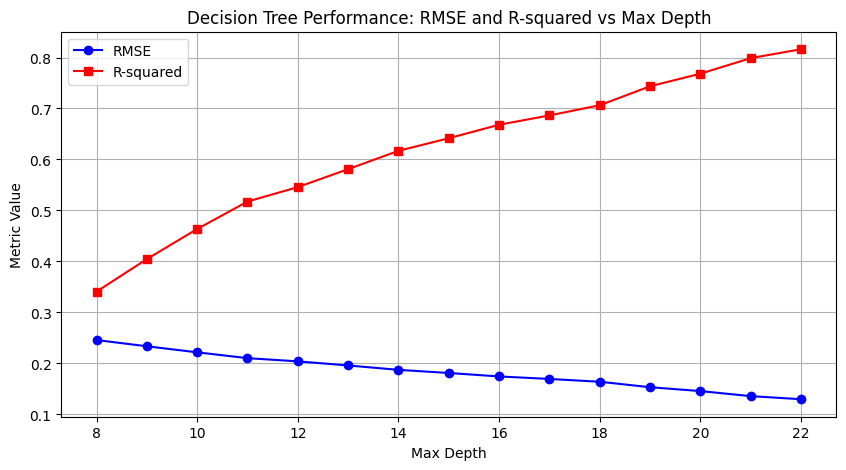

In [100]:
viz = plot_results(results_df = results)
viz

### Visualization Outcome:
##### X-axis: Maximum Depth of Decision Tree (max_depth)

##### Y-axis: Value of RMSE and R-squared metrics

##### Clear identification of performance trends with increasing depth, aiding in model tuning decisions.

## Random Forest

In [113]:
def call_random_forest(train_df, test_df, response_variable, random_state=None, max_depth=None, n_estimators=None):
    # Split into features and target
    x_train = train_df.drop(columns=[response_variable])
    y_train = train_df[response_variable]
    x_test = test_df.drop(columns=[response_variable])
    y_test = test_df[response_variable]

    # Initialize and train Random Forest Regressor
    rf = RandomForestRegressor(random_state=random_state, max_depth=max_depth, n_estimators=n_estimators)
    rf.fit(x_train, y_train)

    # Predict on test set
    preds = rf.predict(x_test)

    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r_squared = r2_score(y_test, preds)

    return rf, rmse, r_squared

In [114]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 2, n_estimators = 1000)

In [115]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=2, n_estimators=1000, random_state=4),
 0.2936131434583558,
 0.059902786726942936)

In [116]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 2, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 4, 'verbose': 0, 'warm_start': False}


In [118]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 5, n_estimators = 1000)

In [119]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=4),
 0.2622929940669216,
 0.2497687311122394)

In [120]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 8, n_estimators = 1000)

In [121]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=8, n_estimators=1000, random_state=4),
 0.22927132578125112,
 0.42678009262357897)

In [122]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 10, n_estimators = 1000)

In [123]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=4),
 0.20199024230301615,
 0.5550793528169434)

In [124]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 13, n_estimators = 1000)

In [125]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=13, n_estimators=1000, random_state=4),
 0.17137689748980847,
 0.6797225716908579)

In [126]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 16, n_estimators = 1000)

In [127]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=16, n_estimators=1000, random_state=4),
 0.14803958630200545,
 0.761011223698855)

In [128]:
rf, rmse, r_squared = call_random_forest(train_df, test_df, "cost", random_state=4, max_depth = 18, n_estimators = 1000)

In [129]:
rf, rmse, r_squared

(RandomForestRegressor(max_depth=18, n_estimators=1000, random_state=4),
 0.13286237942177026,
 0.8075021728067884)

In [136]:
## Evaluating Random Forest

def evaluate_random_forest(train_df, test_df, response_variable, random_state = None, n_estimators = None):
    results = []
    for max_depth in range(2, 19):
        rf, rmse, r_squared = call_random_forest(train_df, test_df, response_variable, random_state, max_depth, n_estimators)
        results.append({"max_depth": max_depth, "rmse": rmse, "r_squared": r_squared})

    return pd.DataFrame(results)

In [ ]:
results = evaluate_random_forest(train_df, test_df, "cost", random_state = 4, n_estimators = 2000)

In [ ]:
## Visualizing
S
def plot_results(results_df):
    plt.figure(figsize=(10, 5))
    plt.plot(results_df["max_depth"], results_df["rmse"], marker='o', label='RMSE', color='b')
    plt.plot(results_df["max_depth"], results_df["r_squared"], marker='s', label='R-squared', color='r')
    plt.xlabel("Max Depth")
    plt.ylabel("Metric Value")
    plt.title("Decision Tree Performance: RMSE and R-squared vs Max Depth")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
viz = plot_results(results_df = results)
viz